In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v17'

# label load

In [6]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# trained model load

In [10]:
encoder = load_model('./weights/residual_encoder_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc2\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[ 1.2375848 ,  2.0081856 ,  1.6512758 ,  3.128366  ],
       [ 0.5351803 ,  0.07197088,  0.8419317 ,  0.6856879 ],
       [11.045432  ,  6.944512  ,  7.84299   ,  7.4823704 ],
       ...,
       [ 0.93368244,  1.6433951 ,  1.0090952 ,  1.1219727 ],
       [ 1.7010933 ,  3.2952101 ,  1.7185432 ,  4.7587624 ],
       [ 5.6591244 ,  3.7621703 ,  6.6203856 ,  0.69541335]],
      dtype=float32)

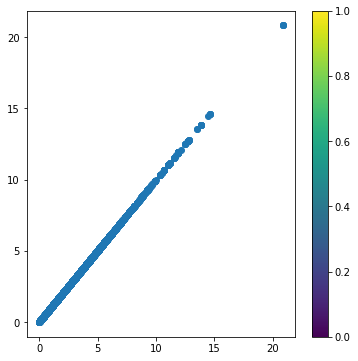

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3
0,1.237585,2.008186,1.651276,3.128366
1,0.535180,0.071971,0.841932,0.685688
2,11.045432,6.944512,7.842990,7.482370
3,3.915327,4.413543,3.069937,4.308259
4,4.100452,4.639769,7.940576,4.091141
...,...,...,...,...
2800,1.641130,4.729570,6.027492,6.899787
2801,2.322318,0.749738,1.464523,0.995229
2802,0.933682,1.643395,1.009095,1.121973
2803,1.701093,3.295210,1.718543,4.758762


In [14]:
train_encode_df.to_excel('./rae_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[9.8501926e-07, 3.5306578e-06, 2.8047175e-03, ..., 1.8636065e-05,
        4.1818443e-10, 1.4113735e-04],
       [1.0019165e-06, 4.1251355e-03, 8.1544705e-03, ..., 3.6332313e-02,
        3.3371920e-11, 6.7919819e-04],
       [9.3016473e-07, 5.3794980e-21, 1.2131675e-07, ..., 7.1965243e-23,
        4.7397603e-11, 1.7118952e-12],
       ...,
       [4.8105879e-04, 4.1737095e-03, 4.2910348e-03, ..., 3.5201169e-03,
        2.5643496e-06, 2.0509494e-02],
       [2.0891103e-07, 6.2171712e-10, 3.0380820e-03, ..., 1.6543311e-08,
        8.7182692e-11, 1.7432960e-07],
       [4.5907798e-11, 1.0397439e-08, 1.3648561e-14, ..., 4.5877720e-17,
        3.8734626e-15, 7.1654502e-11]], dtype=float32)

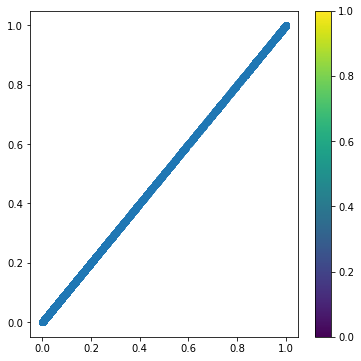

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.4934046345811052
precision :  0.9383423180592992
recall :  0.5828798660527418
f1 :  0.7190808159049832
------------------------
hamming_loss :  0.002960906777700671


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[2.3112257 , 1.456479  , 2.2986438 , 1.8433042 ],
       [1.6461914 , 1.996787  , 4.596471  , 0.        ],
       [0.11717889, 0.15919517, 1.5820594 , 0.9156517 ],
       ...,
       [0.7936802 , 1.6890585 , 0.22970556, 0.5190407 ],
       [0.3253063 , 3.7576056 , 5.960067  , 0.75096655],
       [3.915327  , 4.413543  , 3.0699375 , 4.308259  ]], dtype=float32)

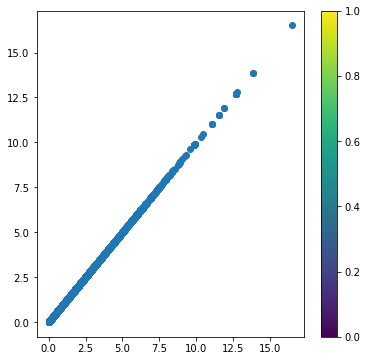

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3
0,2.311226,1.456479,2.298644,1.843304
1,1.646191,1.996787,4.596471,0.000000
2,0.117179,0.159195,1.582059,0.915652
3,0.117909,0.208360,1.340475,0.683269
4,4.569798,3.530068,2.915969,5.492957
...,...,...,...,...
930,1.228936,0.737807,1.940096,4.251618
931,1.701094,3.295210,1.718543,4.758762
932,0.793680,1.689059,0.229706,0.519041
933,0.325306,3.757606,5.960067,0.750967


In [28]:
val_encode_df.to_excel('./rae_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[4.4940753e-04, 1.0639396e-04, 2.2729266e-05, ..., 1.7279718e-03,
        3.1703689e-09, 6.4210815e-04],
       [2.7399564e-08, 4.9692168e-05, 2.3462283e-09, ..., 2.9741603e-08,
        1.3735985e-12, 3.8792141e-06],
       [1.1237584e-06, 1.1816476e-03, 2.9270365e-03, ..., 4.9395156e-03,
        5.9586822e-11, 1.9890261e-03],
       ...,
       [1.0429077e-04, 4.1699188e-04, 5.7001696e-03, ..., 8.3143031e-04,
        4.1233520e-06, 1.7592148e-03],
       [6.2161259e-04, 2.5031464e-03, 1.4386853e-05, ..., 1.5410873e-02,
        9.9808228e-10, 2.0630425e-06],
       [4.3213344e-03, 8.8621732e-10, 9.7779775e-01, ..., 6.0784378e-09,
        1.0526753e-04, 7.1449122e-06]], dtype=float32)

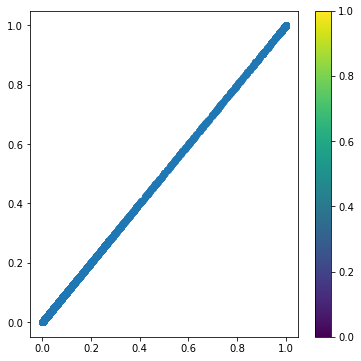

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.4310160427807487
precision :  0.8848684210526315
recall :  0.5009310986964618
f1 :  0.6397146254458977
------------------------
hamming_loss :  0.0037106584479732214


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[2.7040932 , 8.809292  , 9.884574  , 7.197733  ],
       [6.213107  , 2.6236615 , 4.164218  , 0.46488637],
       [2.7348566 , 1.5071439 , 1.8734109 , 2.756508  ],
       ...,
       [4.9614353 , 4.227638  , 1.4234539 , 3.0067105 ],
       [2.1947632 , 1.9883682 , 1.4967676 , 1.3380495 ],
       [1.6061132 , 1.5060583 , 2.3205123 , 0.9527714 ]], dtype=float32)

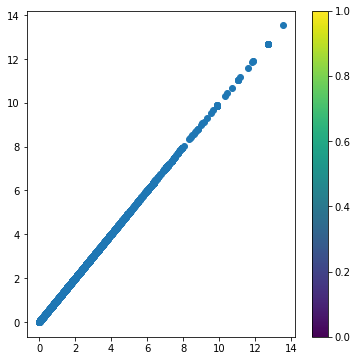

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3
0,2.704093,8.809292,9.884574,7.197733
1,6.213107,2.623662,4.164218,0.464886
2,2.734857,1.507144,1.873411,2.756508
3,1.228936,0.737808,1.940097,4.251619
4,1.032983,0.000000,2.069249,1.546211
...,...,...,...,...
930,3.642006,2.489532,0.381377,2.429291
931,6.362803,7.149104,6.364623,7.359859
932,4.961435,4.227638,1.423454,3.006711
933,2.194763,1.988368,1.496768,1.338050


In [42]:
test_encode_df.to_excel('./rae_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[6.2168068e-03, 4.4469162e-14, 8.7000191e-01, ..., 9.5062454e-08,
        1.7356518e-13, 1.4604378e-08],
       [7.7417933e-10, 1.8395827e-08, 3.3291081e-13, ..., 2.1188642e-17,
        3.3175674e-12, 2.9035795e-12],
       [8.2828519e-06, 5.8214516e-07, 2.2293311e-04, ..., 4.4064468e-04,
        4.3964062e-11, 4.8135490e-07],
       ...,
       [3.7306454e-02, 6.5957134e-10, 1.1412156e-01, ..., 1.0900679e-09,
        1.1495557e-03, 9.2580166e-09],
       [4.0279273e-02, 1.5978714e-03, 2.8421879e-03, ..., 7.1477285e-04,
        1.9834375e-04, 1.8461262e-03],
       [7.2378345e-04, 4.4044349e-03, 9.4391929e-05, ..., 2.4230843e-03,
        6.4249150e-08, 1.9625364e-02]], dtype=float32)

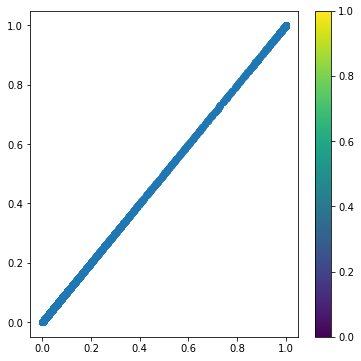

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.39893048128342246
precision :  0.8863134657836644
recall :  0.48344370860927155
f1 :  0.625633034670822
------------------------
hamming_loss :  0.003922929338286321


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.39893048128342246
precision :  0.6874331550802139
recall :  0.5479500891265597
f1 :  0.5886860198624905
------------------------
hamming_loss :  0.003922929338286321


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')